## Вариант 14
> Юсипов Артур ИУ5-24М

| Вариант  | Задание 1 | Задание 2 |
| ------------- | ------------- | ------------- |
| 14  | 14  | 34  |

### Задача №14.
Для набора данных проведите нормализацию для одного (произвольного) числового признака с использованием функции "квадратный корень".
### Задача №34.
Для набора данных проведите процедуру отбора признаков (feature selection). Используйте метод вложений (embedded method). Используйте подход на основе линейной или логистической регрессии (в зависимости от того, на решение какой задачи ориентирован выбранный Вами набор данных - задачи регрессии или задачи классификации).

### Дополнительные требования по группам:
Для студентов группы ИУ5-24М - для произвольной колонки данных построить график "Скрипичная диаграмма (violin plot)".




#### Короткое описание датасета
> Прокат велосипедов в Лондоне.

Данные в датасете имеют информацию о погодных условиях, дате/времени и количестве велосипедов взятых на прокат в Лондоне за несколько лет

#### Описание анализируемых данных
Год — показывает год, когда велосипед взят в аренду.

Месяц — показывает месяц, когда велосипед взят в аренду.

День — показывает день, когда велосипед взят в аренду.

Время — показывает время в часах, когда велосипед взят в аренду.

Количество велосипедов — отражает количество велосипедов, которые были взяты напрокат.

Температура воздуха  — отражает температуру воздуха в градусах Цельсия.

Ощущаемая температура — отражает температуру воздуха, ощущаемую человеком в градусах Цельсия.

Влажность воздуха — показывает текущую влажность воздуха, выраженную в процентах.

Скорость ветра — показывает скорость ветра в километрах в час.

Код погоды — 1 - Ясно; 2 - Кучевые облака; 3 – Перистые облака 4 – Облачно; 7 - Дождь / Легкий дождь; 10 - Дождь с грозой; 26 – Снегопад; 94 - Замораживание тумана

Праздничный ли день — отражается в датасете в качестве 0/1.

Выходной ли день — отражается в датасете в качестве 0/1.

Сезон — 0-весна; 1-лето; 2-осень; 3-зима.


In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
import sklearn

In [110]:
data = pd.read_csv("london_merged.csv")
%matplotlib inline

In [111]:
data['year'] = pd.DataFrame(data['timestamp'].apply(lambda x: pd.to_datetime(x).year))
data['month'] = pd.DataFrame(data['timestamp'].apply(lambda x: pd.to_datetime(x).month))
data['day'] = pd.DataFrame(data['timestamp'].apply(lambda x: pd.to_datetime(x).day))
data['hour'] = pd.DataFrame(data['timestamp'].apply(lambda x: pd.to_datetime(x).hour))


In [112]:
data.head(10)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,4
5,2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1.0,0.0,1.0,3.0,2015,1,4,5
6,2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0,2015,1,4,6
7,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0,2015,1,4,7
8,2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4.0,0.0,1.0,3.0,2015,1,4,8
9,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,3.0,0.0,1.0,3.0,2015,1,4,9


In [113]:
data_features = list(zip(
# признаки
[i for i in data.columns],
zip(
    # типы колонок
    [str(i) for i in data.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in data.isnull().sum()]
)))
# Признаки с типом данных и количеством пропусков
data_features

[('timestamp', ('object', 0)),
 ('cnt', ('int64', 0)),
 ('t1', ('float64', 0)),
 ('t2', ('float64', 0)),
 ('hum', ('float64', 0)),
 ('wind_speed', ('float64', 0)),
 ('weather_code', ('float64', 0)),
 ('is_holiday', ('float64', 0)),
 ('is_weekend', ('float64', 0)),
 ('season', ('float64', 0)),
 ('year', ('int64', 0)),
 ('month', ('int64', 0)),
 ('day', ('int64', 0)),
 ('hour', ('int64', 0))]

In [114]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

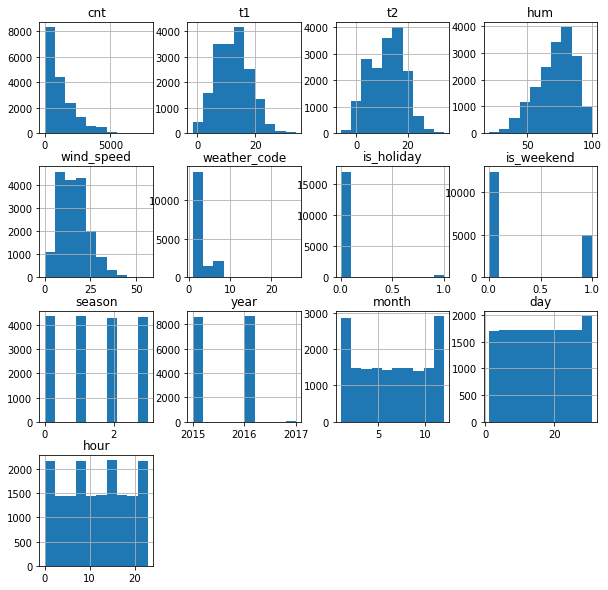

In [115]:
data.hist(figsize=(10,10));

## Нормализацию числового признака `wind_speed` с использованием функции "квадратный корень".

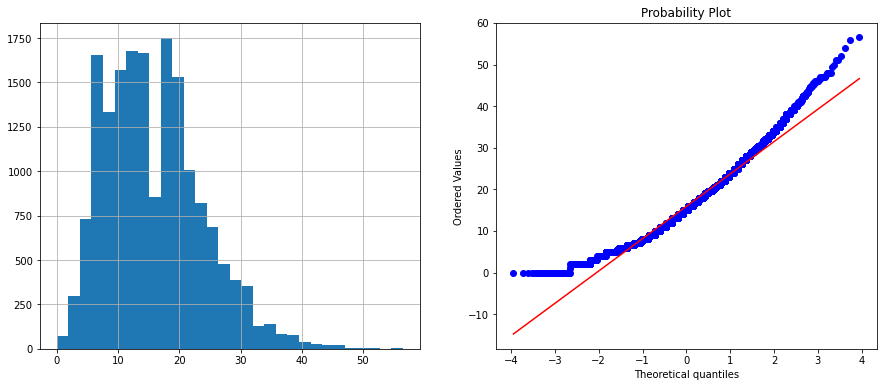

In [116]:
diagnostic_plots(data, 'wind_speed')

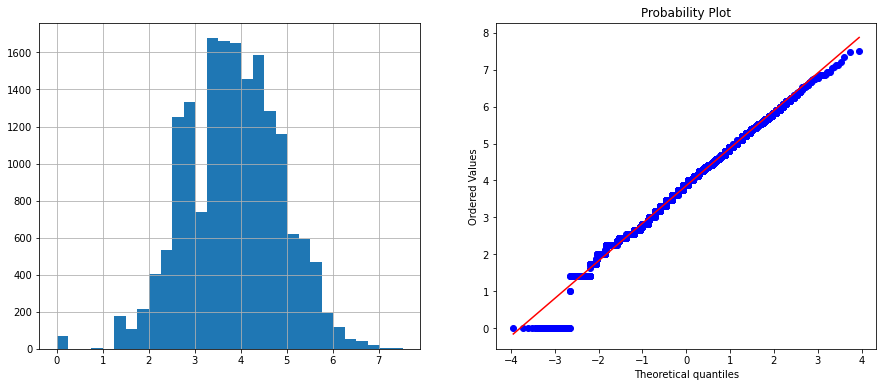

In [117]:
data['wind_speed_sqr'] = data['wind_speed']**(1/2) 
diagnostic_plots(data, 'wind_speed_sqr')

## Отбора признаков (feature selection).Через метод вложений (embedded method). Используя подход на основе линейной регрессии

In [135]:
# Удаляю заведомо ненужные поля и ставлю целевой признак
X = data.drop(columns = ['timestamp','t2','season','cnt','year', 'day', 'wind_speed'])
y = data['cnt']

# На случай если бы мы обучали модель
# X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.25)

In [136]:
feature_names = [i for i in X.columns]
feature_names

['t1',
 'hum',
 'weather_code',
 'is_holiday',
 'is_weekend',
 'month',
 'hour',
 'wind_speed_sqr']

In [133]:
# Используем L1-регуляризацию
e_ls1 = Lasso(random_state=1)
e_ls1.fit(X, y)
# Коэффициенты регрессии
list(zip(feature_names, e_ls1.coef_))

[('t1', 40.233421384045585),
 ('hum', -23.37517545617068),
 ('weather_code', -12.830866407127093),
 ('is_holiday', -264.03135032777806),
 ('is_weekend', -209.4363881595773),
 ('year', 83.46451125245848),
 ('month', 8.769414047009773),
 ('hour', 31.244499739800567),
 ('wind_speed_sqr', -13.447397513756924)]

In [134]:
sel_e_ls1 = SelectFromModel(e_ls1)
sel_e_ls1.fit(X, y)
list(zip(feature_names, sel_e_ls1.get_support()))

[('t1', True),
 ('hum', True),
 ('weather_code', True),
 ('is_holiday', True),
 ('is_weekend', True),
 ('year', True),
 ('month', True),
 ('hour', True),
 ('wind_speed_sqr', True)]